# IMPORTING NECESSARY LIBRARY

In [1]:
# It is used for data manipulation and analysis.
import pandas as pd

# It is used for numerical operations.
import numpy as np

# It is used for creating plots and charts.
import matplotlib.pyplot as plt

# It is used to display plots inline in jupyter notebook.
%matplotlib inline

# It is used for statistical data visualization.
import seaborn as sns

# Ignore warnings messages to keep the output clean.
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')


In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# Data Preprocessing , Data Manipulation and Cleaning.

# Feature Drop Operation

In [4]:
drop_col=['EmpNumber']
data.drop(drop_col , inplace=True , axis=1)

### Analysis:

>- we are removed unnecessary or unwanted features ['EmpNumber'] from the dataset.It could be done to improve computational efficiency, remove redundant information, or enhance the performance of machine learning models by eliminating irrelevant columns.

# Check for duplicate data

In [5]:
print("\033[1;31m  \033[1m Total no of duplicate value :-",data.duplicated().sum())

   Total no of duplicate value :- 0


## To check all the null values from the dataset

In [6]:
data.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### Observations:

>- There are no missing values in any of the columns, and the dataset is complete in terms of these specific features. Having a dataset without missing values is beneficial for analysis and modeling,

# Outliers

**Outliers are data points that significantly differ from other observations in a dataset. They can occur due to various reasons such as measurement errors, natural variation, or rare events. Identifying outliers is crucial in data analysis as they can distort statistical analyses and machine learning models, leading to biased results and inaccurate predictions.**

## Outliers in Numerical Columns

**Now let's visualize the distribution of numerical columns and identify any outliers before proceeding with outlier treatment.**

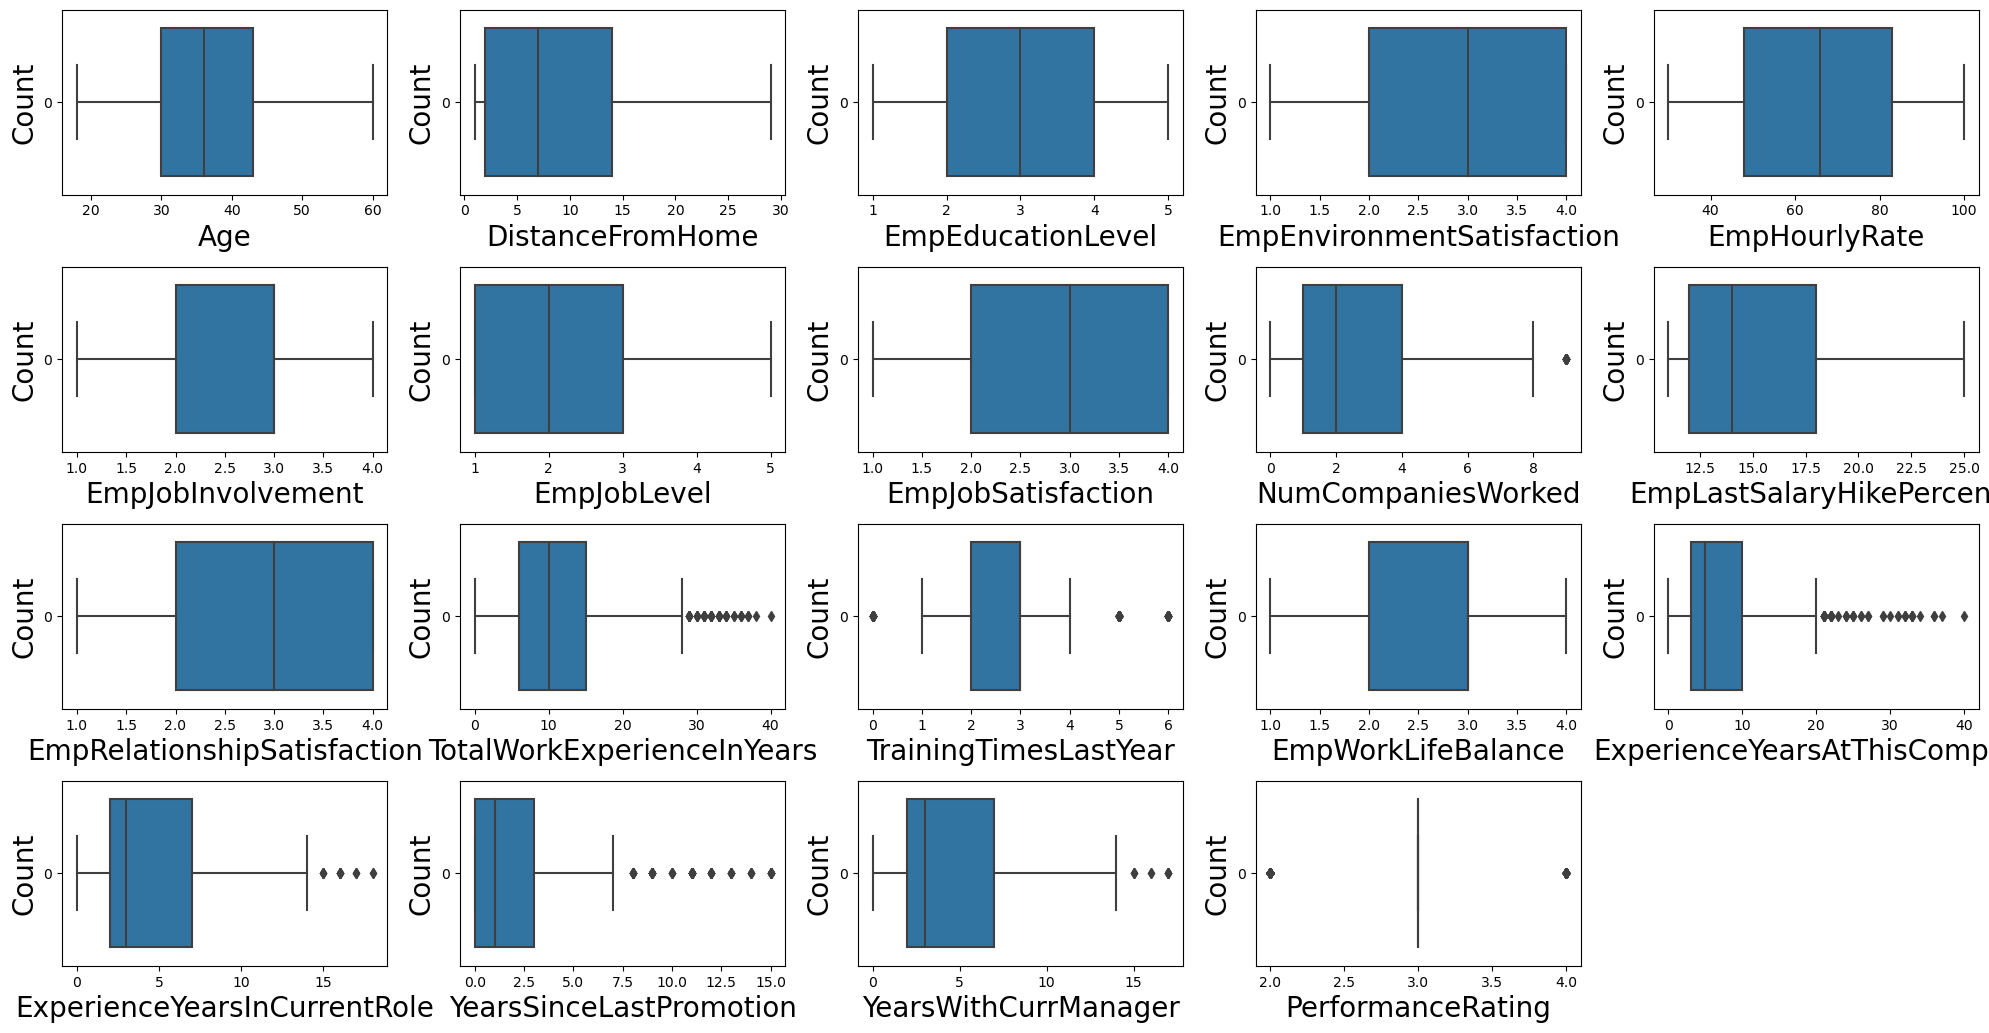

In [7]:
# Filter out non-numeric columns
numeric_columns = data.select_dtypes(include=['int64']).columns

# Here, We are setting the figure for subplots with specified size and background color.
plt.figure(figsize=(20, 15), facecolor='white')

# Initializing the subplot counter.
plotnumber = 1

# Iterating through each numeric column in the 'data' DataFrame
for column in numeric_columns:
    # Limiting the number of subplots to 40
    if plotnumber <= 40:
        # Creating a subplot
        ax = plt.subplot(6, 5, plotnumber)

        # Plotting a horizontal boxplot for the current column
        sns.boxplot(data[column], orient='h')

        # Adding labels to the subplot
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Count', fontsize=20)

    # Incrementing the plot number
    plotnumber += 1

# Adjusting the layout for better visualization
plt.tight_layout()
plt.show()

**Insights :**

>- In the dataset, numerical columns like NumCompaniesWorked, TrainingTimesLastYear, TotalWorkExperienceInYears,ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, and PerformanceRating exhibit outliers. Additionally, some columns show a right-skewed distribution.

## Handling Outliers

**Winsorization Method :**

>- Winsorization is a technique used to handle outliers by capping extreme values at a specified percentile. Instead of removing outliers entirely or transforming them, Winsorization replaces extreme values with values from the tails of the distribution.

>- By applying Winsorization, We can handle outliers effectively without removing them entirely, which helps in maintaining the integrity of the dataset while mitigating the impact of extreme values on the analysis or model performance.

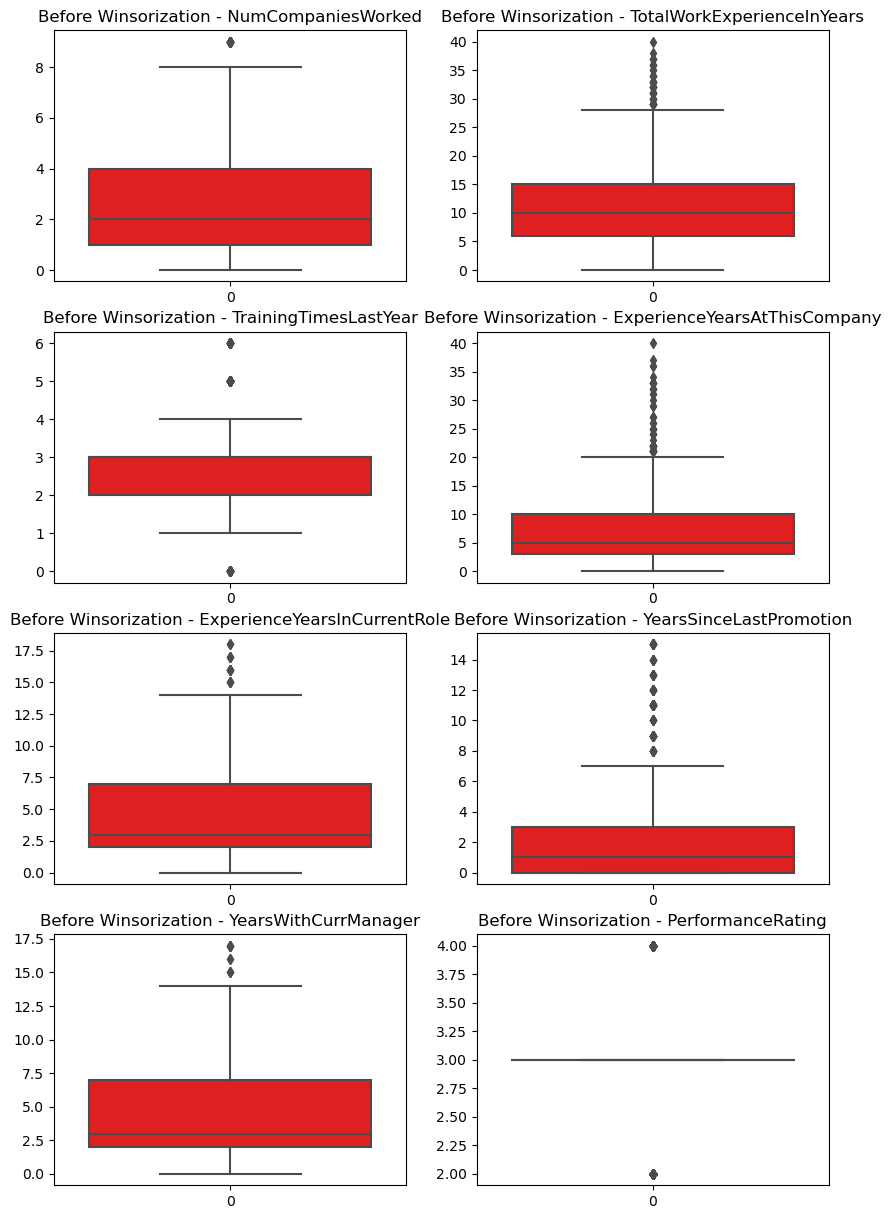

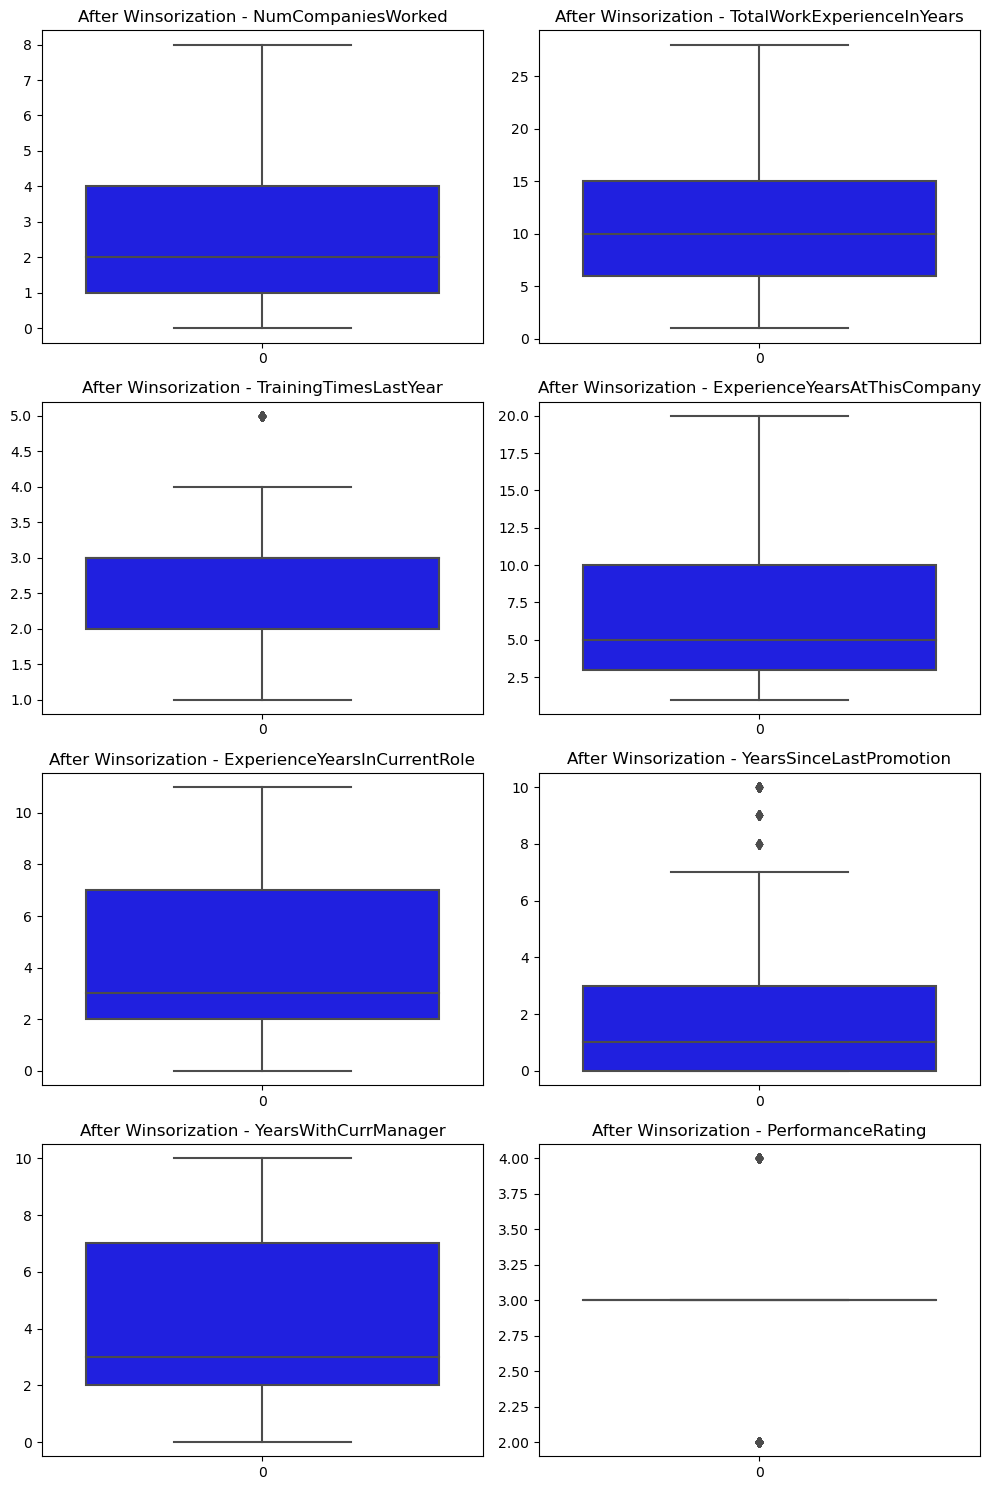

In [19]:
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to apply Winsorization
columns_to_winsorize = ['NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
                        'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
                        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']

# Create a copy of the DataFrame to avoid modifying the original data
data_winsorized = data.copy()

# Apply Winsorization to each specified column
for column in columns_to_winsorize:
    data_winsorized[column] = winsorize(data[column], limits=[0.05, 0.05])

# Plot boxplots before and after Winsorization for each column
plt.figure(figsize=(10, 15))
for i, column in enumerate(columns_to_winsorize, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data[column], color='red', orient='v')
    plt.title(f'Before Winsorization - {column}')

plt.figure(figsize=(10, 15))
for i, column in enumerate(columns_to_winsorize, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data_winsorized[column], color='blue', orient='v')
    plt.title(f'After Winsorization - {column}')

plt.tight_layout()
plt.show()

## boxplot after outlier treatment

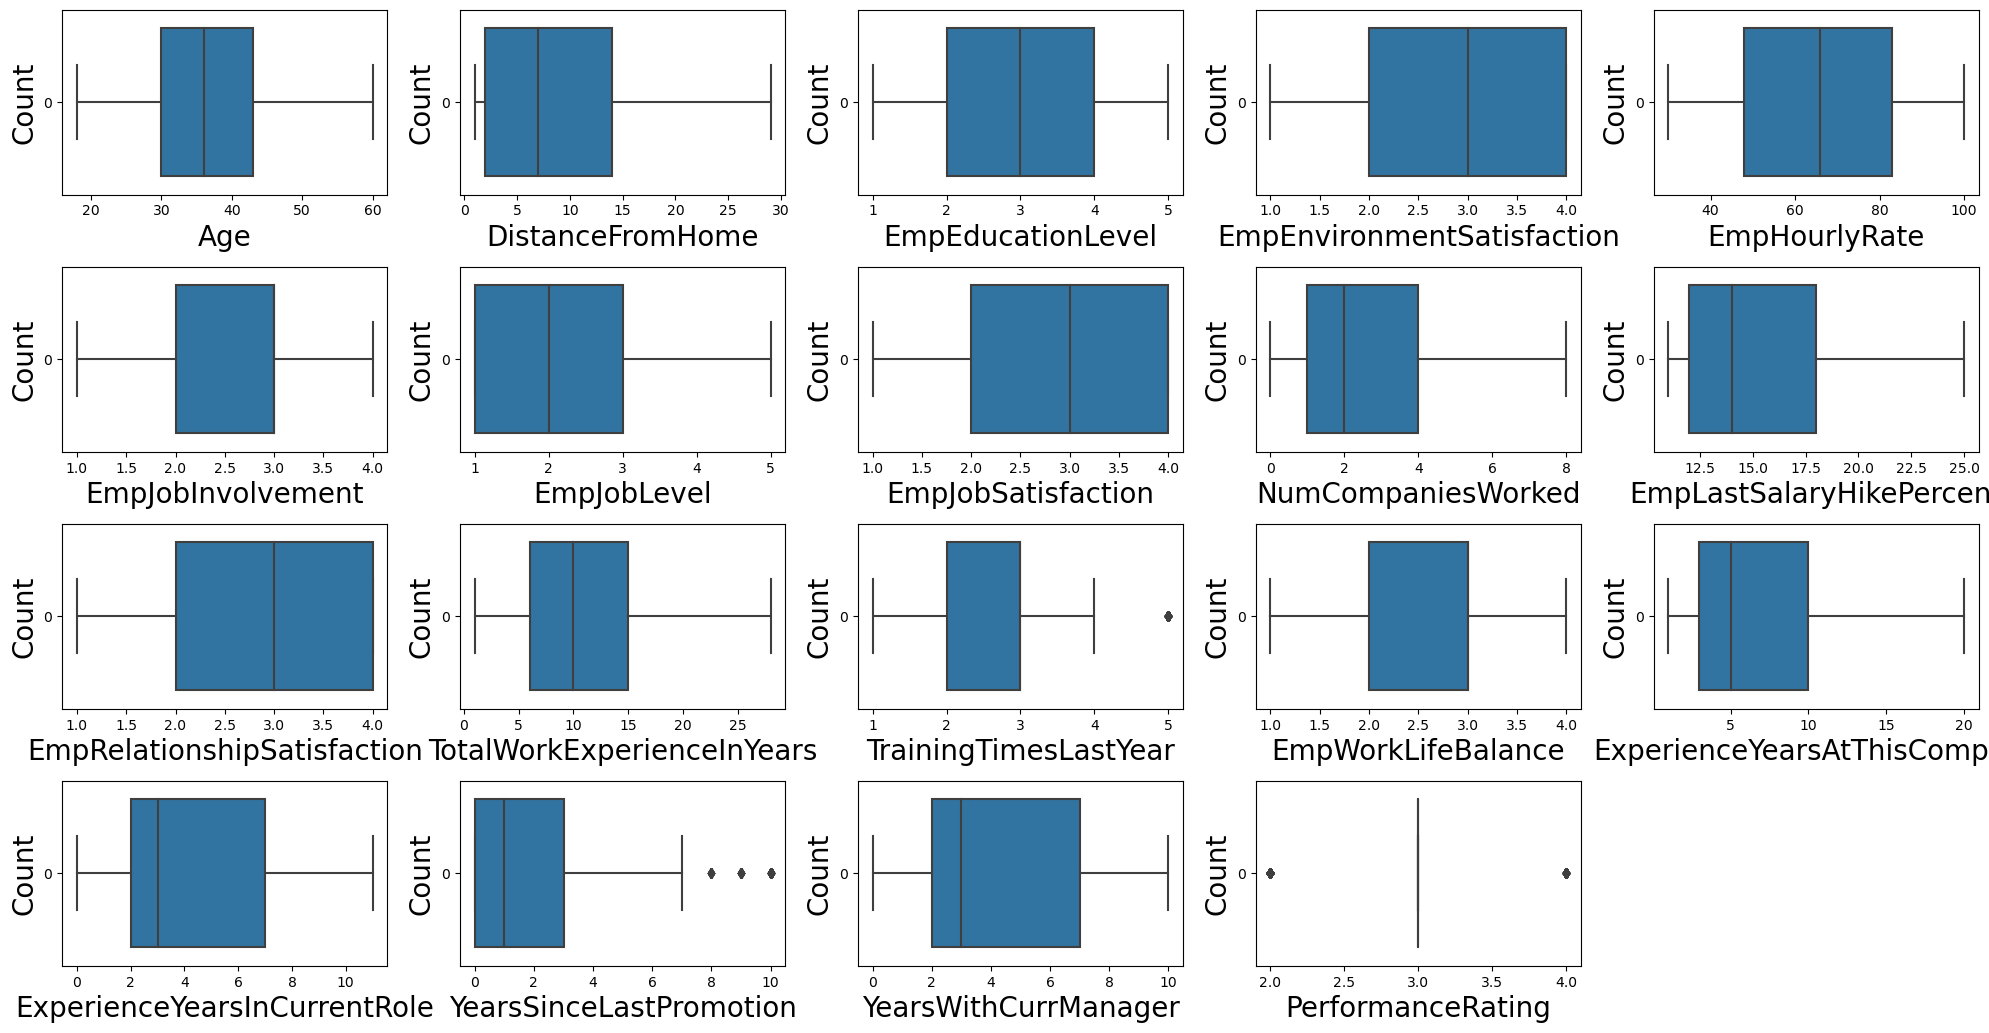

In [21]:
# Filter out non-numeric columns
numeric_columns = data_winsorized.select_dtypes(include=['int64']).columns

# Here, We are setting the figure for subplots with specified size and background color.
plt.figure(figsize=(20, 15), facecolor='white')

# Initializing the subplot counter.
plotnumber = 1

# Iterating through each numeric column in the 'data' DataFrame
for column in numeric_columns:
    # Limiting the number of subplots to 40
    if plotnumber <= 40:
        # Creating a subplot
        ax = plt.subplot(6, 5, plotnumber)

        # Plotting a horizontal boxplot for the current column
        sns.boxplot(data_winsorized[column], orient='h')

        # Adding labels to the subplot
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Count', fontsize=20)

    # Incrementing the plot number
    plotnumber += 1

# Adjusting the layout for better visualization
plt.tight_layout()
plt.show()

# Label Encoding for Categorical Data in DataFrame

>- LabelEncoder from scikit-learn to transform categorical data (textual labels) in a DataFrame (df) into numerical labels.

>- The fit_transform method is used to fit the encoder on the data and simultaneously transform the categorical values into numerical labels.

>- This transformation is particularly useful when working with machine learning algorithms that require numerical input, as many algorithms operate on numerical data.

In [22]:
from sklearn.preprocessing import LabelEncoder

df = data_winsorized.apply(LabelEncoder().fit_transform)

In [26]:
#df.head()
pd.set_option('display.max_columns',None)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,14,1,2,2,5,13,2,9,2,3,25,2,1,3,1,0,1,3,9,1,1,9,7,0,8,0,1
1,29,1,2,2,5,13,2,13,3,3,12,2,1,0,2,0,1,3,19,1,2,6,7,1,7,0,1
2,22,1,1,1,5,13,1,4,3,3,18,1,2,0,5,1,10,2,19,1,2,17,11,1,10,0,2
3,23,1,0,0,3,8,2,9,3,1,43,1,4,3,3,0,4,1,22,1,1,19,6,10,6,0,1
4,42,1,2,2,5,13,2,15,3,0,54,2,1,0,8,0,3,3,9,0,2,1,2,2,2,0,1


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   Gender                        1200 non-null   int32
 2   EducationBackground           1200 non-null   int32
 3   MaritalStatus                 1200 non-null   int32
 4   EmpDepartment                 1200 non-null   int32
 5   EmpJobRole                    1200 non-null   int32
 6   BusinessTravelFrequency       1200 non-null   int32
 7   DistanceFromHome              1200 non-null   int64
 8   EmpEducationLevel             1200 non-null   int64
 9   EmpEnvironmentSatisfaction    1200 non-null   int64
 10  EmpHourlyRate                 1200 non-null   int64
 11  EmpJobInvolvement             1200 non-null   int64
 12  EmpJobLevel                   1200 non-null   int64
 13  EmpJobSatisfaction            120

# Feature scaling

Feature scaling is a crucial preprocessing step in machine learning, particularly for algorithms that rely on distance-based metrics or gradient descent optimization. It ensures that all features contribute equally to the learning process and prevents features with larger scales from dominating those with smaller scales.

There are several techniques for feature scaling, two of the most common ones being:

**1. Standardization (Z-score normalization):**

Scales the features so that they have a mean of 0 and a standard deviation of 1.
Suitable when the features follow a Gaussian distribution.

**2. Normalization (Min-Max scaling):**

Scales the features to a fixed range, typically between 0 and 1.
Useful when the features have different ranges or units.
Preserves the shape of the original distribution.

**We use StandardScaler for feature scaling because:**

1. **Preservation of Variance**: StandardScaler preserves the variance of the original data while standardizing it. This means that the spread of the data remains the same after scaling.

2. **Robustness to Outliers**: StandardScaler is less sensitive to outliers compared to other scaling methods like Min-Max scaling. It scales the data based on the mean and standard deviation, making it more robust to outliers.

3. **Compatibility with Many Algorithms**: Many machine learning algorithms, such as linear models, support vector machines, and neural networks, assume that the features are centered around 0 and have a standard deviation of 1. StandardScaler ensures that the data meets these assumptions, making it compatible with a wide range of algorithms.

4. **Interpretability**: Scaling the features using StandardScaler does not change the interpretation of the data. The transformed features are still in the same units as the original features, making it easier to interpret the results.

5. **Stability**: StandardScaler provides stable results across different datasets and is less affected by the scale of the features compared to other scaling techniques.

Overall, StandardScaler is a versatile and widely used method for feature scaling that helps improve the performance and stability of machine learning models.

In [27]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler instance
scale = StandardScaler()

# Specifying the numerical features for scaling
numerical_features = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent',
                      'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
                      'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsWithCurrManager']

# Scaling selected numerical features in the 'data' DataFrame using a loop
for feature in numerical_features:
    df[feature] = scale.fit_transform(df[[feature]])

# Displaying the modified 'data' DataFrame after Standard Scaling.
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,-0.541458,1,2,2,5,13,2,0.102061,2,3,-0.543569,2,1,3,1,0,-0.889111,3,-0.157490,-0.710170,1,0.596247,0.852375,0,1.244242,0,1
1,1.109888,1,2,2,5,13,2,0.591464,3,3,-1.187042,2,1,0,2,0,-0.889111,3,1.216965,-0.710170,2,0.031975,0.852375,1,0.935050,0,1
2,0.339260,1,1,1,5,13,1,-0.509693,3,3,-0.890055,1,2,0,5,1,1.594054,2,1.216965,-0.710170,2,2.100972,2.059278,1,1.862627,0,2
3,0.449349,1,0,0,3,8,2,0.102061,3,1,0.347393,1,4,3,3,0,-0.061389,1,1.629301,-0.710170,1,2.477153,0.550649,10,0.625857,0,1
4,2.541054,1,2,2,5,13,2,0.836165,3,0,0.891870,2,1,0,8,0,-0.337297,3,-0.157490,-1.615806,2,-0.908478,-0.656253,2,-0.610913,0,1


# Saving Preprocessed Data:



>- Saved the preprocessed dataset for subsequent use in the model creation section.

>- Ensured that the preprocessed data is stored in a format suitable for model training and evaluation, such as CSV or HDF5.

In [28]:
# This will save the DataFrame as an Excel file with the name 'preprocessed_data.xlsx' and without an index column.

df.to_excel('preprocessed_df.xlsx', index=False) 

In [29]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,-0.541458,1,2,2,5,13,2,0.102061,2,3,-0.543569,2,1,3,1,0,-0.889111,3,-0.157490,-0.710170,1,0.596247,0.852375,0,1.244242,0,1
1,1.109888,1,2,2,5,13,2,0.591464,3,3,-1.187042,2,1,0,2,0,-0.889111,3,1.216965,-0.710170,2,0.031975,0.852375,1,0.935050,0,1
2,0.339260,1,1,1,5,13,1,-0.509693,3,3,-0.890055,1,2,0,5,1,1.594054,2,1.216965,-0.710170,2,2.100972,2.059278,1,1.862627,0,2
3,0.449349,1,0,0,3,8,2,0.102061,3,1,0.347393,1,4,3,3,0,-0.061389,1,1.629301,-0.710170,1,2.477153,0.550649,10,0.625857,0,1
4,2.541054,1,2,2,5,13,2,0.836165,3,0,0.891870,2,1,0,8,0,-0.337297,3,-0.157490,-1.615806,2,-0.908478,-0.656253,2,-0.610913,0,1
